In [ ]:
import os  # Operating system interfaces
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [ ]:
 import kagglehub

# Download latest version
path = kagglehub.dataset_download("kaustubhb999/tomatoleaf")

print("Path to dataset files:", path)

100%|██████████| 179M/179M [00:05<00:00, 33.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kaustubhb999/tomatoleaf/versions/1


In [ ]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/root/.cache/kagglehub/datasets/kaustubhb999/tomatoleaf/versions/1',
    labels='inferred',
    label_mode='categorical',
    image_size=(128, 128),
    batch_size=64)

val_data = val_data.map(lambda x, y: (x / 128.0, y))

Found 11000 files belonging to 1 classes.


In [ ]:
import os

# Verify that the directory exists
if not os.path.exists(path):
    print("The specified path does not exist:", path)
else:
    print("Directory exists.")


Directory exists.


In [ ]:
# Filter only image files with specific extensions
image_files = [f for f in os.listdir(path) if f.endswith(('.jpg', '.png', '.jpeg'))]


In [ ]:
# Recursively find all image files in the dataset directory
image_files = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):
            image_files.append(os.path.join(root, file))

print(f"Found {len(image_files)} image files.")


Found 95 image files.


In [ ]:
tomato_path = os.path.join(path, 'tomato')

if os.path.exists(tomato_path):
    print("Contents of the 'tomato' directory:")
    for item in os.listdir(tomato_path):
        print(item)
else:
    print("'tomato' directory not found.")


Contents of the 'tomato' directory:
val
cnn_train.py
train


In [ ]:
# Adjusting path if images are in 'tomato' directly or further in 'train'
image_path = os.path.join(tomato_path, 'train') if 'train' in os.listdir(tomato_path) else tomato_path

# Recursively find image files
image_files = [f for f in os.listdir(image_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

print(f"Found {len(image_files)} image files in '{image_path}'.")


Found 0 image files in '/root/.cache/kagglehub/datasets/kaustubhb999/tomatoleaf/versions/1/tomato/train'.


In [ ]:
train_path = os.path.join(tomato_path, 'train')

if os.path.exists(train_path):
    print("Contents of the 'train' directory:")
    for item in os.listdir(train_path):
        print(item)
else:
    print("'train' directory not found.")


Contents of the 'train' directory:
Tomato___Septoria_leaf_spot
Tomato___Leaf_Mold
Tomato___healthy
Tomato___Bacterial_spot
Tomato___Tomato_mosaic_virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Late_blight
Tomato___Early_blight


In [ ]:
# Find all image files in subdirectories of 'train'
image_files = []
for root, dirs, files in os.walk(train_path):
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):
            image_files.append(os.path.join(root, file))

print(f"Found {len(image_files)} image files.")


Found 90 image files.


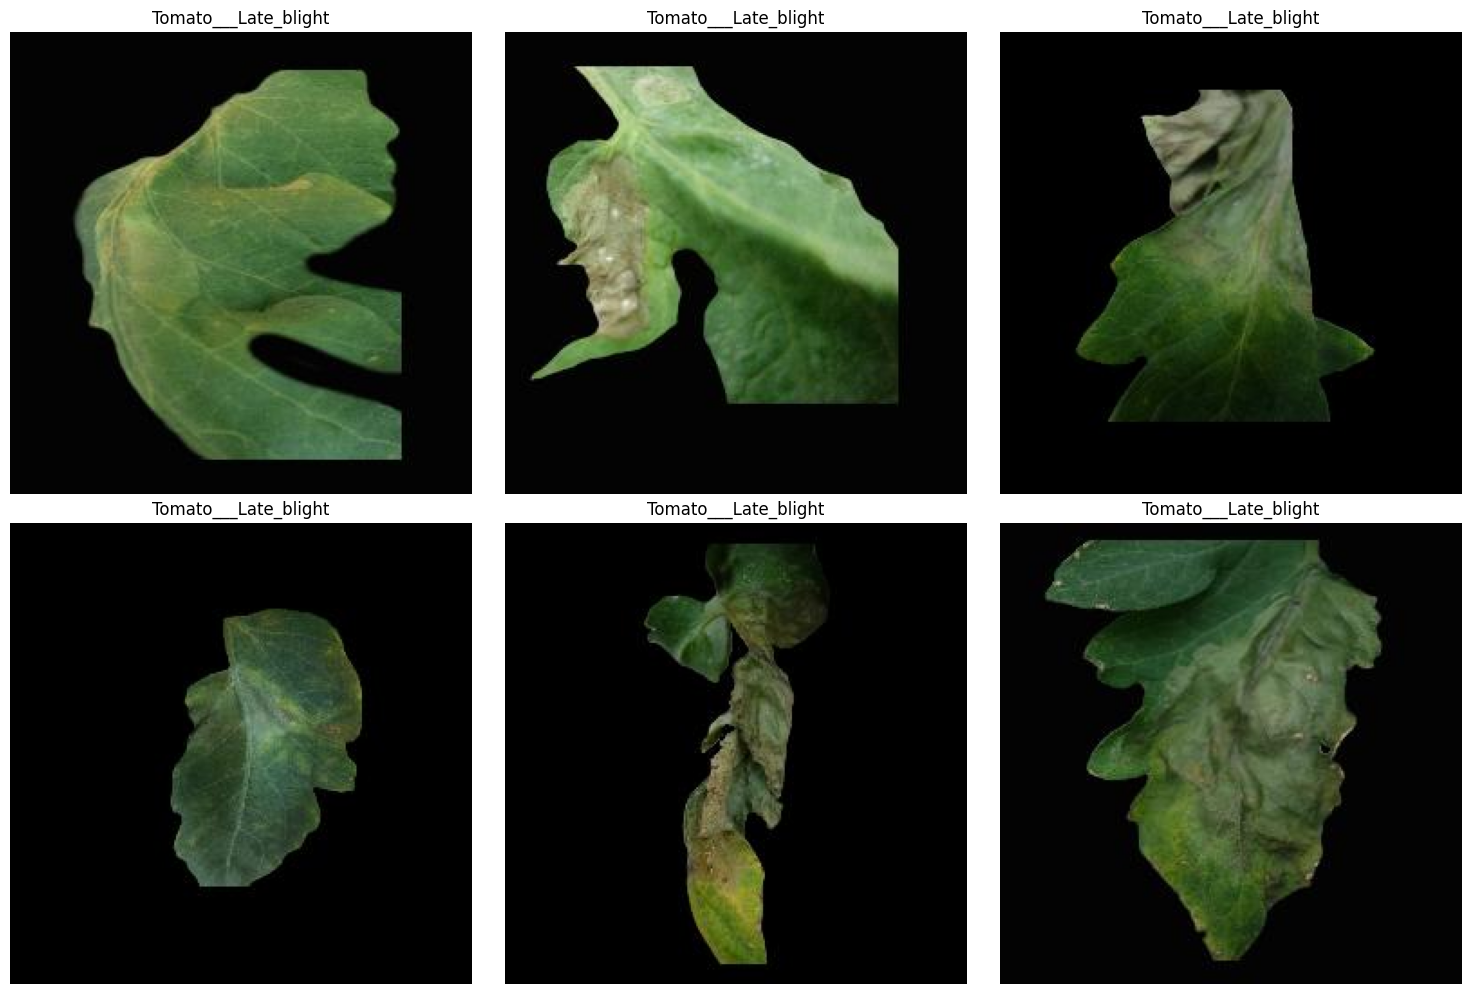

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
num_images_to_display = min(6, len(image_files))

for i in range(num_images_to_display):
    img_path = image_files[i]
    label = img_path.split(os.sep)[-2]  # Get class label from folder name

    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()


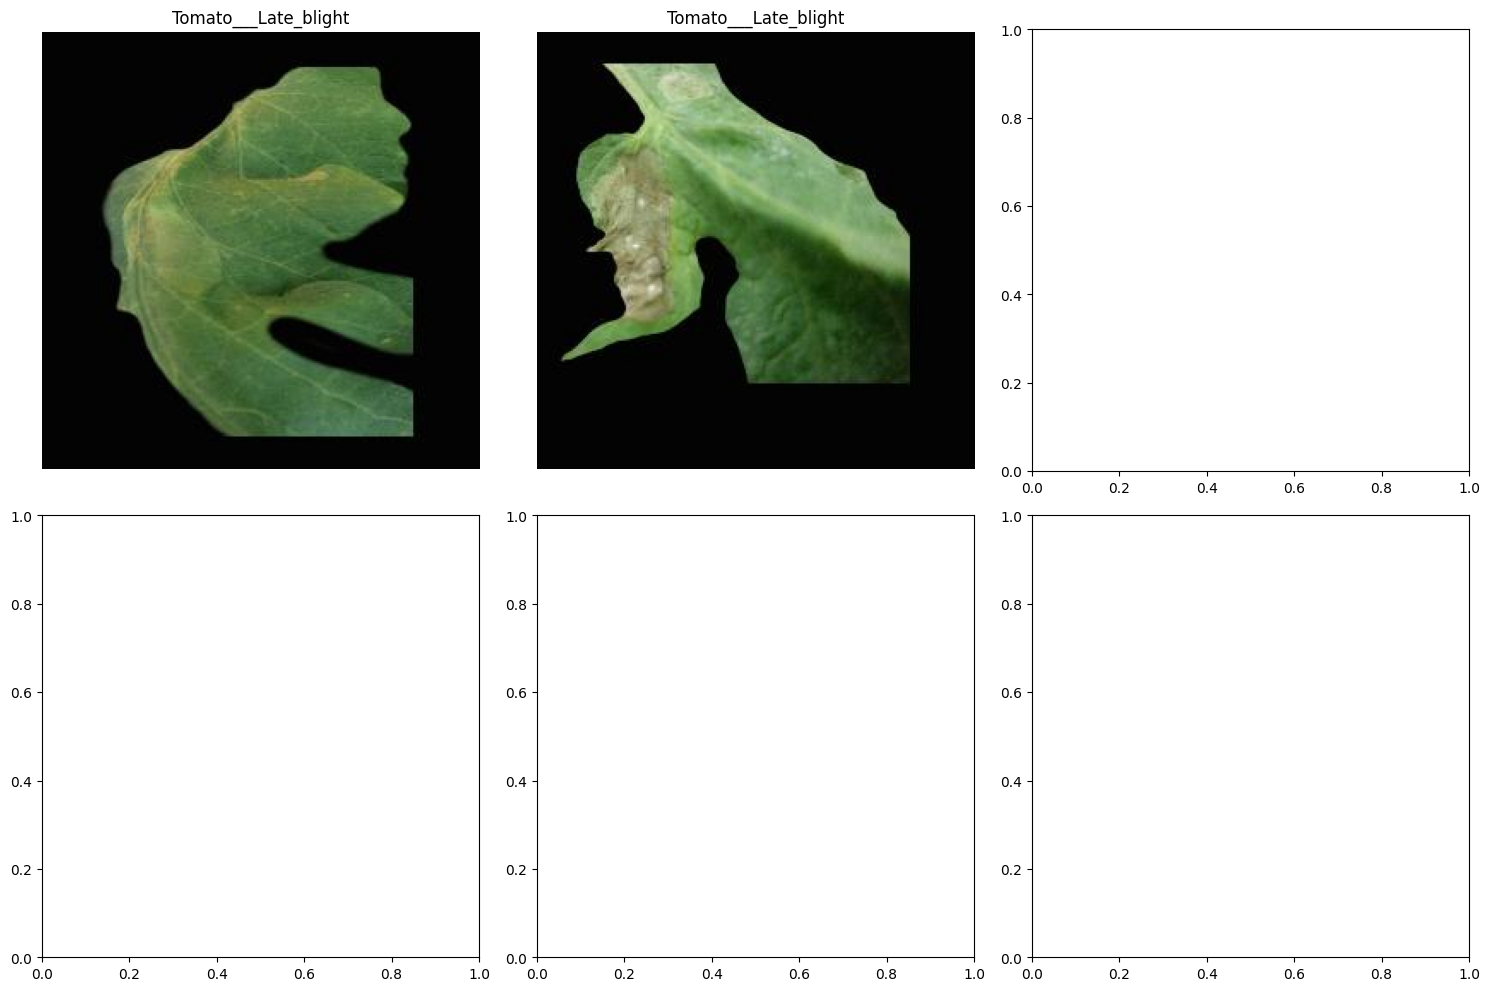

In [ ]:
# Display images from multiple classes
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
displayed_images = 0

for class_folder in os.listdir(train_path):
    class_path = os.path.join(train_path, class_folder)
    if os.path.isdir(class_path):
        image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

        for i in range(min(2, len(image_files))):  # Show 2 images per class
            if displayed_images >= 6:
                break

            img_path = os.path.join(class_path, image_files[i])
            img = mpimg.imread(img_path)
            ax = axs[displayed_images // 3, displayed_images % 3]
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(class_folder)

            displayed_images += 1

    if displayed_images >= 6:
        break

plt.tight_layout()
plt.show()


Found 90 image files in total.


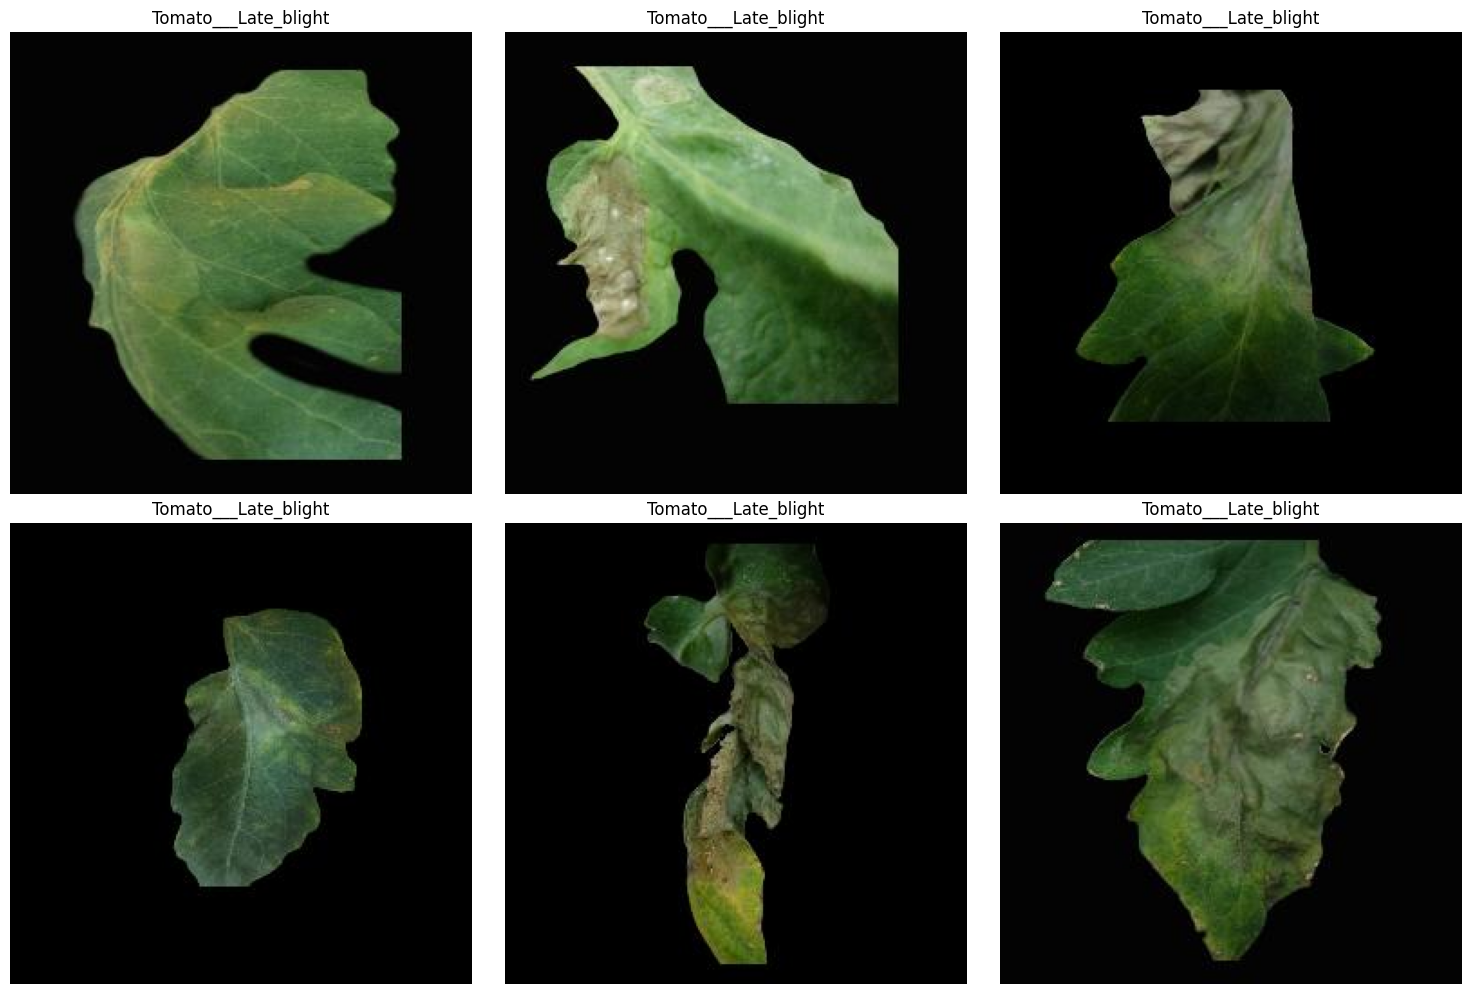

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the directory containing class subdirectories
path = "/root/.cache/kagglehub/datasets/kaustubhb999/tomatoleaf/versions/1/tomato/train"

# List all subdirectories (classes)
class_dirs = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

# Collect all image file paths
image_files = []
for class_dir in class_dirs:
    class_path = os.path.join(path, class_dir)
    image_files += [os.path.join(class_path, f) for f in os.listdir(class_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

print(f"Found {len(image_files)} image files in total.")

# Display the first 6 images
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
num_images_to_display = min(6, len(image_files))

for i in range(num_images_to_display):
    img_path = image_files[i]
    label = img_path.split('/')[-2]  # Use the folder name as the label

    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()


Found 1000 images in '/root/.cache/kagglehub/datasets/kaustubhb999/tomatoleaf/versions/1/tomato/train/Tomato___Bacterial_spot'.


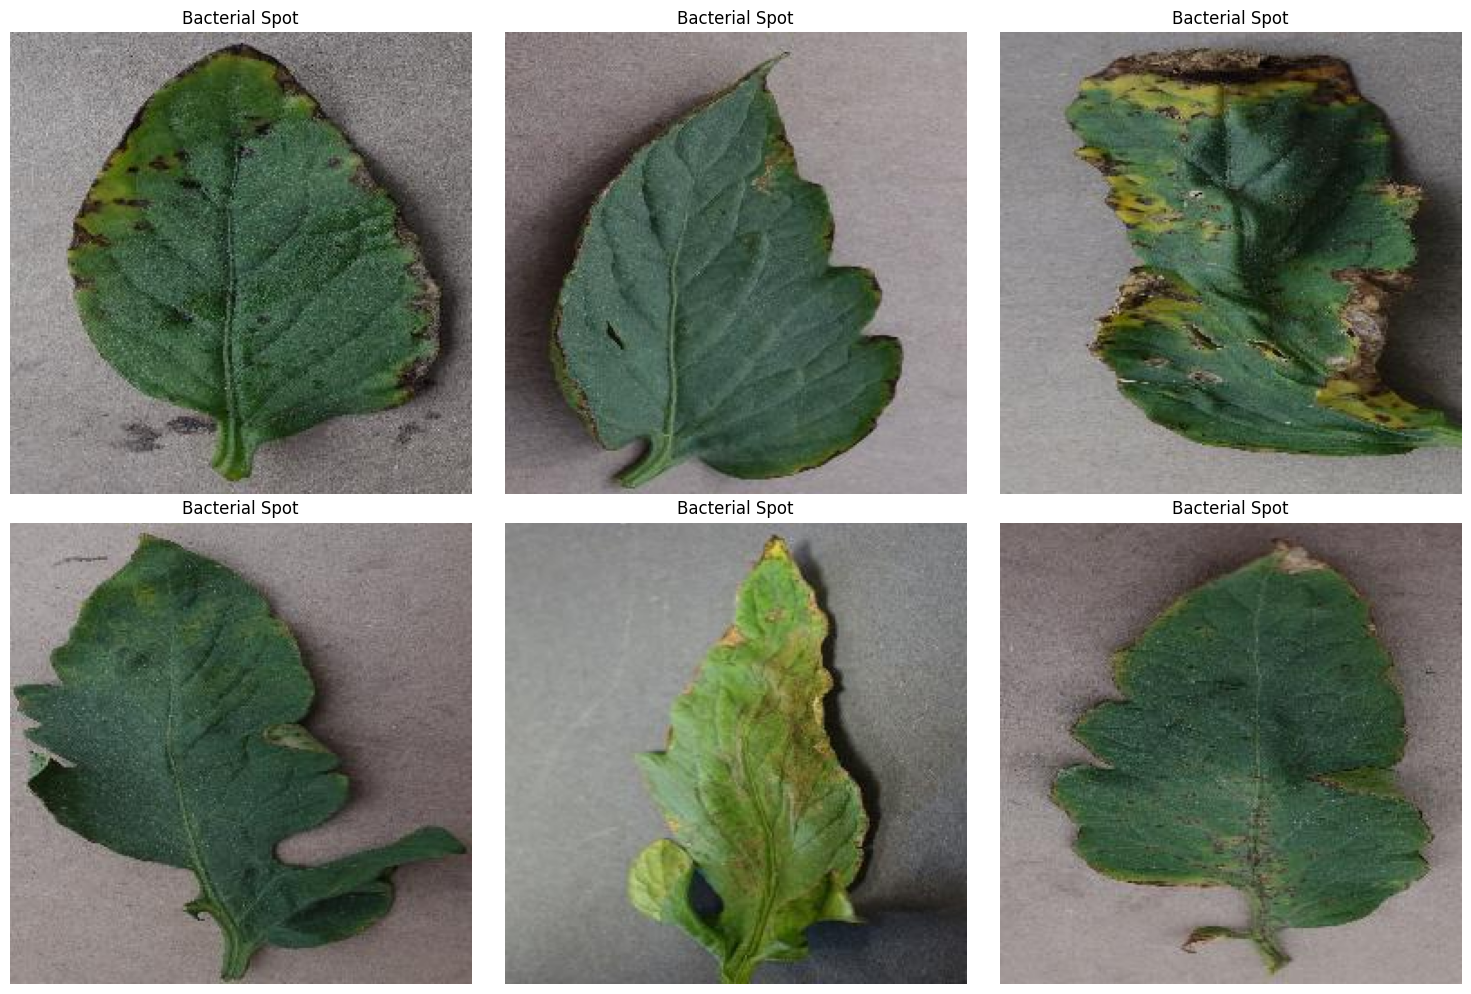

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Correct path to the directory containing images
path = "/root/.cache/kagglehub/datasets/kaustubhb999/tomatoleaf/versions/1/tomato/train/Tomato___Bacterial_spot"

# Check if the directory exists
if os.path.exists(path):
    # Get a list of all image file names in the directory
    image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if len(image_files) == 0:
        print(f"No images found in directory: {path}")
    else:
        print(f"Found {len(image_files)} images in '{path}'.")

        # Display the first 6 images, or fewer if less than 6 images exist
        num_images_to_display = min(6, len(image_files))
        fig, axs = plt.subplots(2, 3, figsize=(15, 10))

        for i in range(num_images_to_display):
            # Get the image file name and its label
            image_file = image_files[i]
            label = "Bacterial Spot"  # Use class name or customize

            # Load and display the image
            img_path = os.path.join(path, image_file)
            img = mpimg.imread(img_path)
            ax = axs[i // 3, i % 3]
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(label)

        # Hide any unused subplots if fewer than 6 images are displayed
        for j in range(num_images_to_display, 6):
            axs[j // 3, j % 3].axis('off')

        plt.tight_layout()
        plt.show()
else:
    print(f"Directory does not exist: {path}")


In [ ]:
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(128,128,3),
    pooling='avg'
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
conv_base.trainable = False

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Use 'learning_rate' instead of 'lr'
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
import os

# Check the contents of the directory where your images are stored
train_path = '/root/.cache/kagglehub/datasets/kaustubhb999/tomatoleaf/versions/1/tomato/train'
print(os.listdir(train_path))  # This will list the contents of the 'train' directory


['Tomato___Septoria_leaf_spot', 'Tomato___Leaf_Mold', 'Tomato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Late_blight', 'Tomato___Early_blight']


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory # Import the necessary function

In [ ]:
train_data = image_dataset_from_directory(
    '/root/.cache/kagglehub/datasets/kaustubhb999/tomatoleaf/versions/1/tomato/train',  # Correct path to your training data
    labels='inferred',  # Automatically infer labels based on folder structure
    label_mode='categorical',  # Multi-class classification (one-hot encoding)
    image_size=(128, 128),  # Resize images to 256x256
    batch_size=64  # Set the batch size
)

# Check the classes to ensure they are correctly inferred
print(train_data.class_names)  # This will print the class names based on directory structure


Found 10000 files belonging to 10 classes.
['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the training dataset
train_data = image_dataset_from_directory(
    '/root/.cache/kagglehub/datasets/kaustubhb999/tomatoleaf/versions/1/tomato/train',  # Correct path to your training data
    labels='inferred',           # Automatically infer labels based on folder structure
    label_mode='categorical',    # Use categorical labels for multi-class classification
    image_size=(128, 128),       # Resize images to 256x256
    batch_size=64               # Set the batch size
)

# Define the validation dataset
val_data = image_dataset_from_directory(
    '/root/.cache/kagglehub/datasets/kaustubhb999/tomatoleaf/versions/1/tomato/val',  # Correct path to your validation data
    labels='inferred',           # Automatically infer labels based on folder structure
    label_mode='categorical',    # Use categorical labels for multi-class classification
    image_size=(128, 128),       # Resize images to 256x256
    batch_size=64                # Set the batch size
)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Use Adam optimizer with a learning rate of 0.0001
    loss='categorical_crossentropy',        # Categorical cross-entropy loss for multi-class classification
    metrics=['accuracy']                   # Track accuracy during training
)

# Train the model with 50 epochs and EarlyStopping
history = model.fit(
    train_data,                           # Training data
    epochs=50,                             # Set the number of epochs to 50
    validation_data=val_data,             # Validation data
    callbacks=[EarlyStopping(patience=5)]  # Stop training early if no improvement after 5 epochs
)


Found 10000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.
Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 67s 246ms/step - accuracy: 0.2620 - loss: 2.1795 - val_accuracy: 0.6160 - val_loss: 1.3958
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.6130 - loss: 1.2362 - val_accuracy: 0.7320 - val_loss: 0.9767
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.7054 - loss: 0.9440 - val_accuracy: 0.7760 - val_loss: 0.7689
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.7597 - loss: 0.7797 - val_accuracy: 0.8020 - val_loss: 0.6385
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.7795 - loss: 0.6847 - val_accuracy: 0.8170 - val_loss: 0.5593
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.8187 - loss: 0.5852 - val_accuracy: 0.8330 - val_loss: 0.5036
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.8242 - loss: 0.5430 - val_accuracy: 0.8450 - val_loss: 0.4653
Epoc

In [ ]:
# Evaluate the model on the validation data
evaluation = model.evaluate(val_data)

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9069 - loss: 0.3239
Validation Loss: 0.27814963459968567
Validation Accuracy: 0.9120000004768372


In [ ]:
model.save("tomato_leaf_model.h5")


In [ ]:
model.save("tomato_leaf_model.keras")


In [ ]:
from google.colab import files
files.download('/content/tomato_leaf_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Week 7

In [ ]:
# Parameters
vocab_size = 1000
max_len = 100
embedding_dim = 16

# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # 3 categories: Positive, Neutral, Negative
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Example text data and sentiment labels
texts = ["My tomato plant has yellow leaves", "The leaves are curled and dry", "I see some healthy plants", "There are spots on the leaves"]
labels = ['Negative', 'Negative', 'Positive', 'Neutral']

# Tokenizer and preprocessing
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X_pad = pad_sequences(X, maxlen=100)

# Convert labels to numeric form
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(labels)
y = tf.keras.utils.to_categorical(y, num_classes=3)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Define the RNN model
model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=100),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # 3 categories: Positive, Neutral, Negative
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val)
)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3333 - loss: 1.1000 - val_accuracy: 1.0000 - val_loss: 1.0925
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.3333 - loss: 1.0984 - val_accuracy: 1.0000 - val_loss: 1.0947
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.6667 - loss: 1.0975 - val_accuracy: 1.0000 - val_loss: 1.0959
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6667 - loss: 1.0967 - val_accuracy: 1.0000 - val_loss: 1.0971
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6667 - loss: 1.0958 - val_accuracy: 1.0000 - val_loss: 1.0980
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6667 - loss: 1.0949 - val_accuracy: 0.0000e+00 - val_loss: 1.1008
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 1.0000 - loss: 1.0938 - val_accuracy: 0.0000e+00 - val_loss: 1.1030
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 1.0000 - loss: 1.0927 - val_accuracy: 0.0000e+00 - val_

In [ ]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.9077
Validation Loss: 0.9076634645462036
Validation Accuracy: 1.0


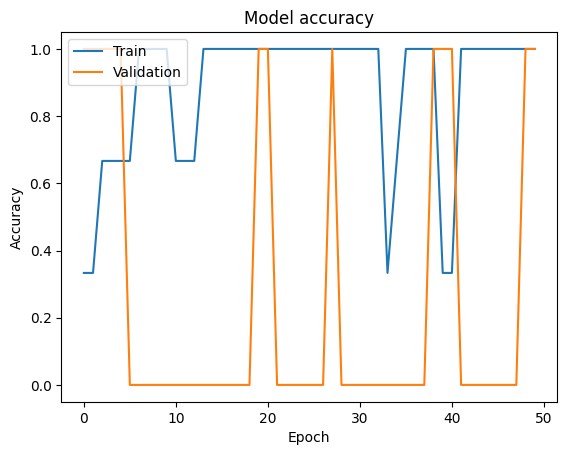

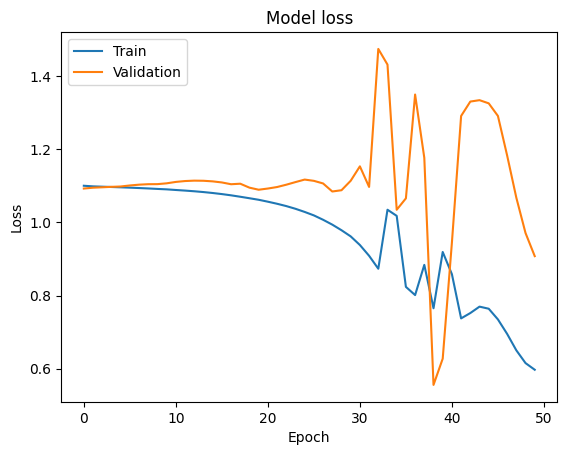

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Example of making a prediction on new text
new_text = ["My tomato plant is doing great!"]
new_text_seq = tokenizer.texts_to_sequences(new_text)
new_text_pad = pad_sequences(new_text_seq, maxlen=100)

prediction = model.predict(new_text_pad)
predicted_label = encoder.inverse_transform([prediction.argmax()])
print(f"Predicted Sentiment: {predicted_label[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Predicted Sentiment: Negative


In [ ]:
from google.colab import files
files.download('/content/tomato_leaf_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>